# Exploratory Data Analysis

### Methodology
- Bar plot of frequency of exercises
- line plot of weight moved for each exercise
- Calendar of gym frequency

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import calendar

master = pd.read_csv("../../../data/processed/master.csv")
master["Date"] = pd.to_datetime(master["Date"])

C:\Users\brand\AppData\Local\Temp\ipykernel_18852\1387791972.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.countplot(x='Workout', data=master.sort_values(by="Workout"),
C:\Users\brand\AppData\Local\Temp\ipykernel_18852\1387791972.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90)


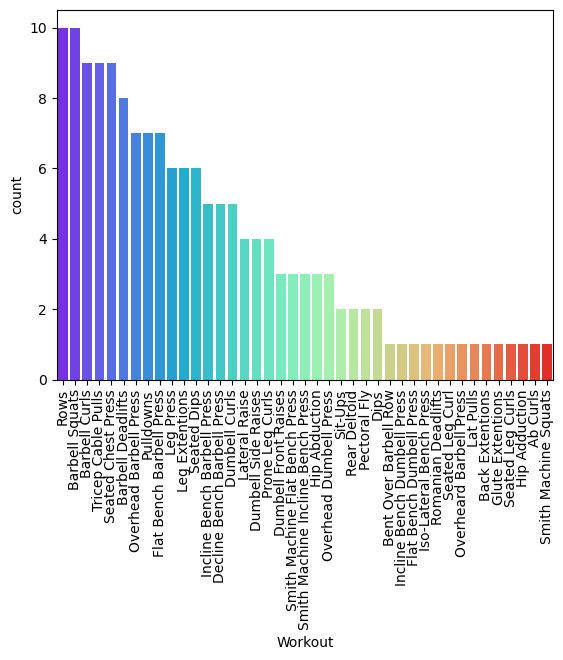

In [ ]:
barplot = sns.countplot(x='Workout', data=master.sort_values(by="Workout"), 
                        palette='rainbow', order=master['Workout'].value_counts().index)

barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90)
barplot.set_title("Exercise Frequency")
plt.savefig("../visuals/Workout_Freq.png")
plt.show()


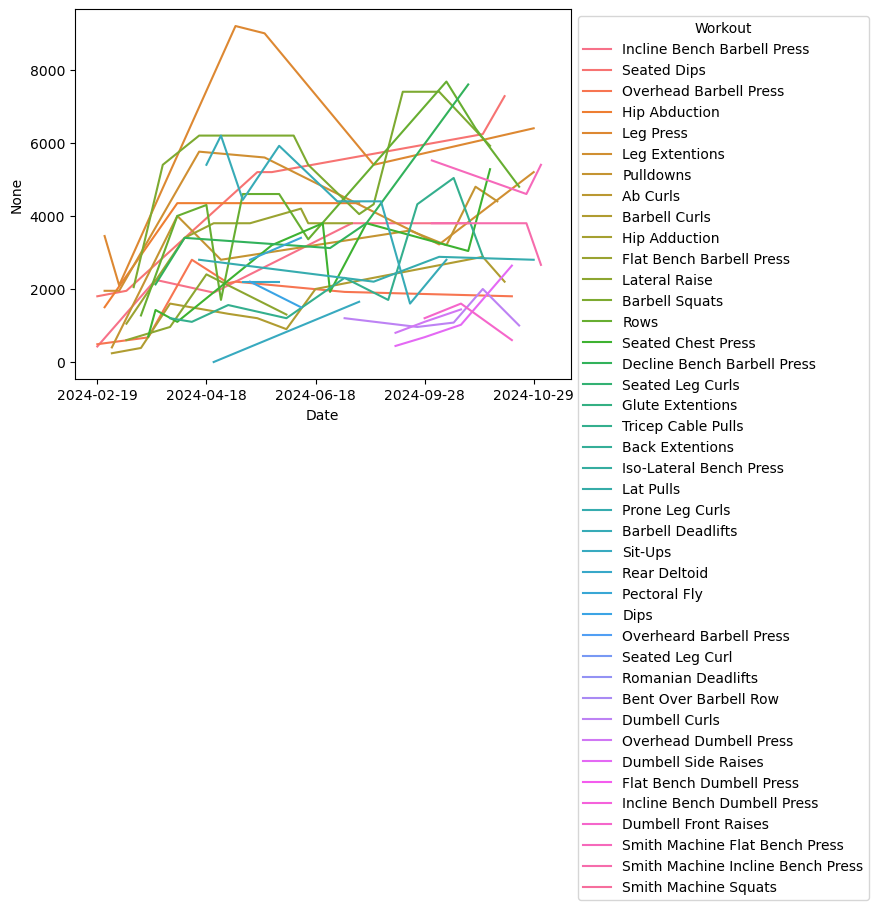

In [ ]:
ax = sns.lineplot(data=master, x="Date", 
             y=master["Weight"] * master["Reps"] * master["Sets"],
             hue="Workout")
ax.set_title("Total weight moved by exercise")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(np.arange(0, 70, 15))
plt.savefig("../visuals/Sum_Workout_Weight.png")
plt.show()

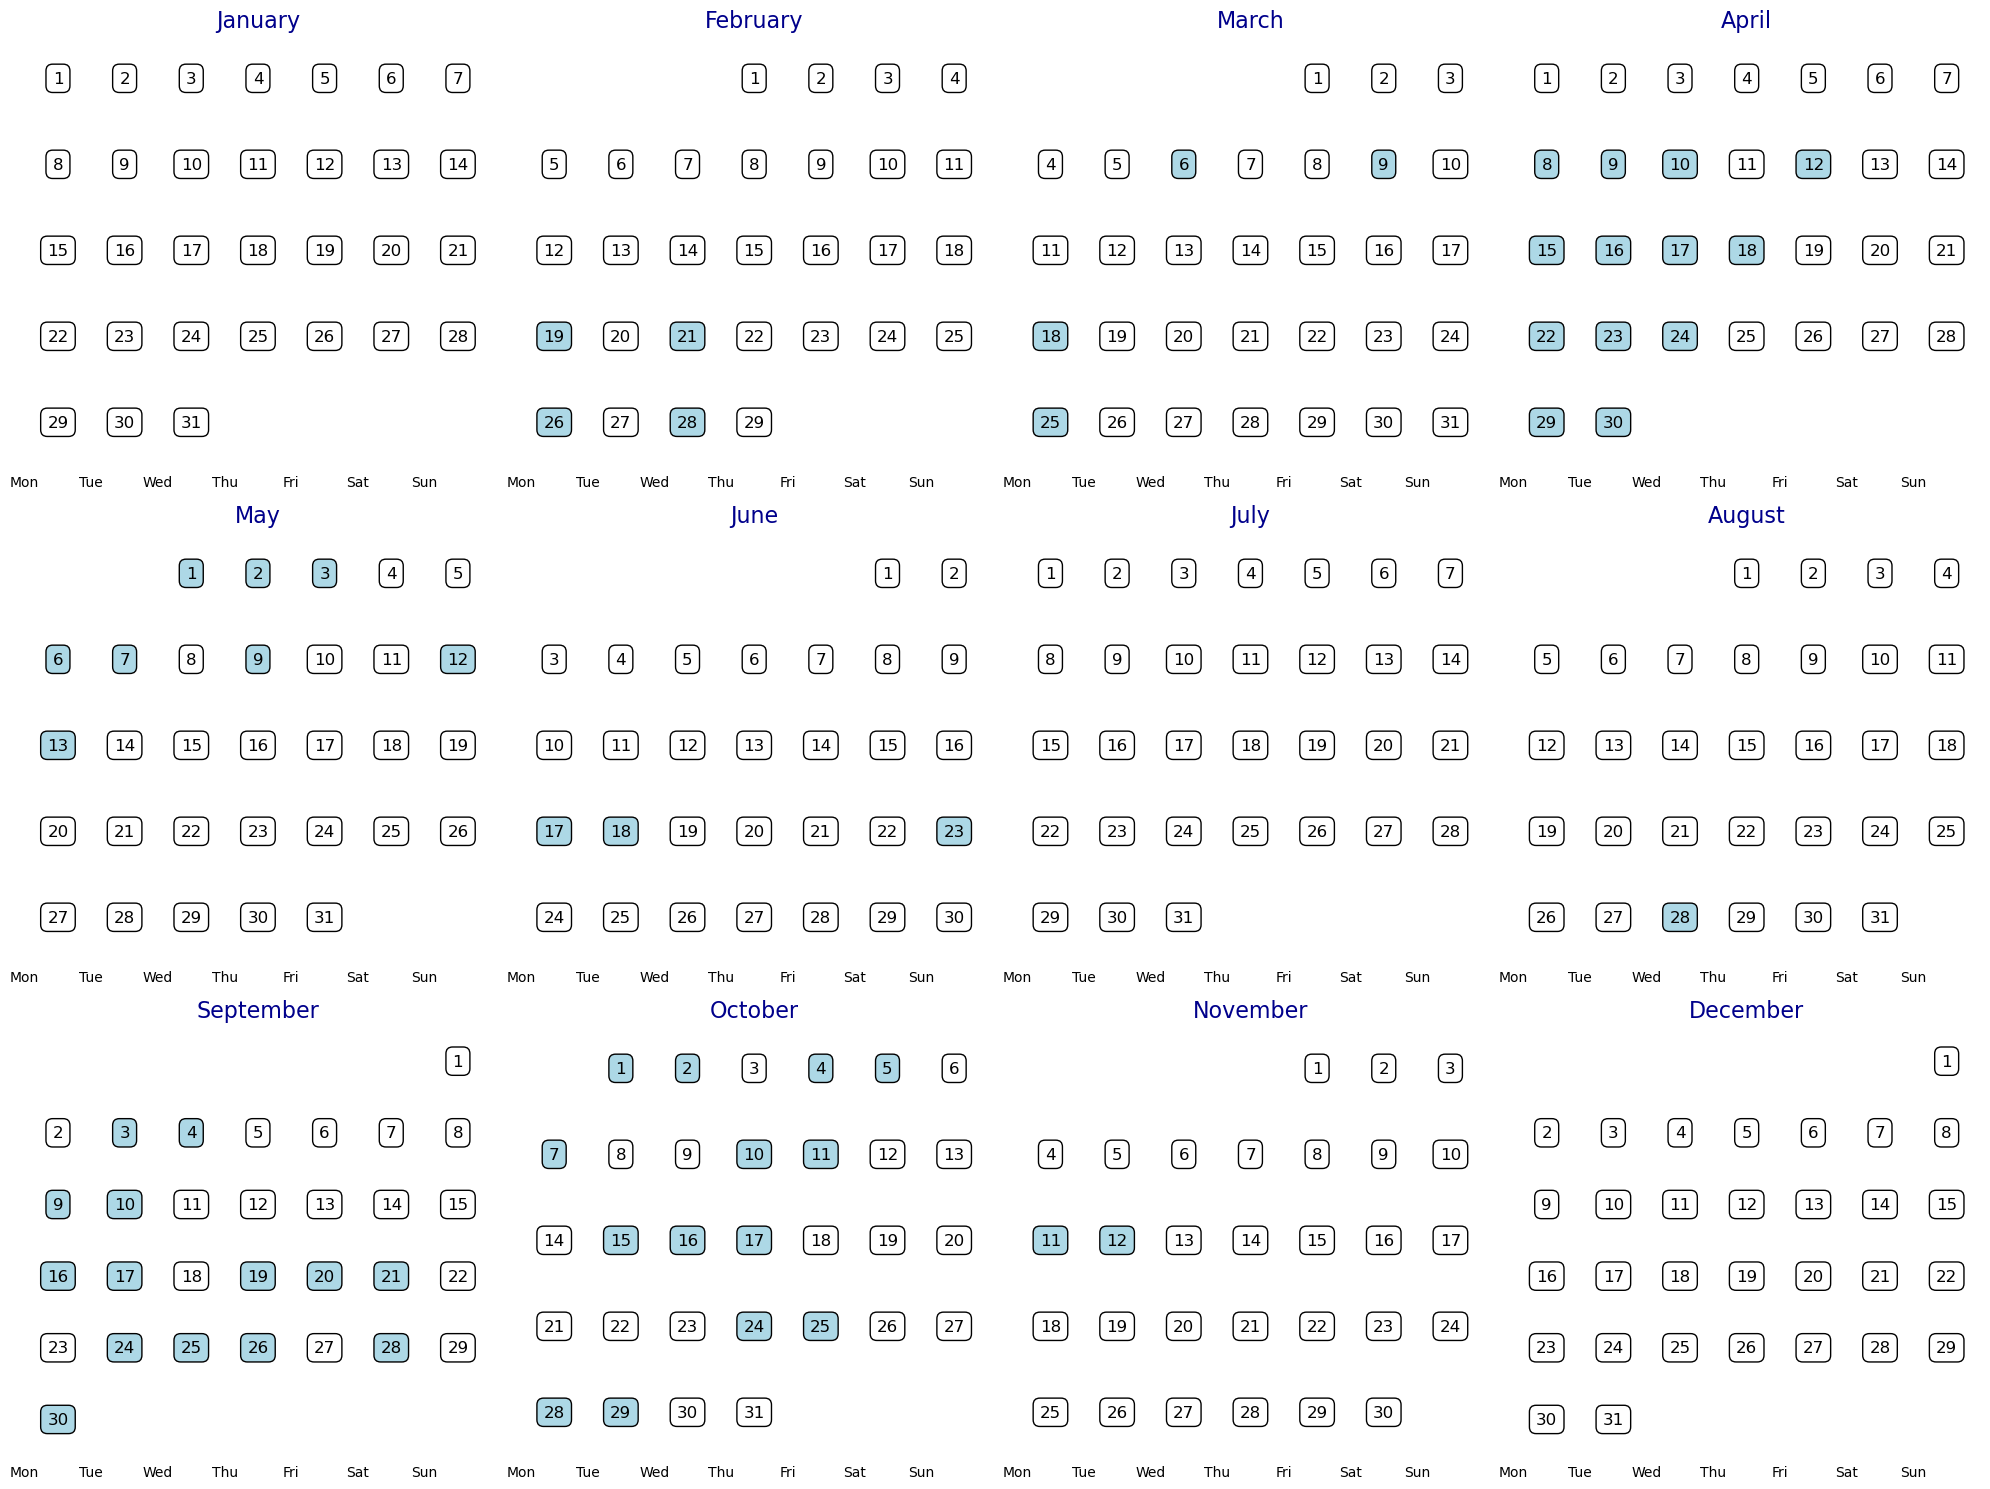

In [14]:
# Extract year and highlighted days by month
year = 2024
highlighted_days_by_month = {
    month: master[master['Date'].dt.month == month]['Date'].dt.day.tolist()
    for month in range(1, 13)
}

# Create a 3x4 grid for the 12 months
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

# Custom color palette
weekday_color = "white"
weekend_color = "white"
highlight_color = "lightblue"
text_color = "black"
title_color = "darkblue"

for month, ax in enumerate(axes, start=1):
    cal = calendar.Calendar()
    month_days = cal.monthdayscalendar(year, month)
    highlighted_days = highlighted_days_by_month.get(month, [])
    
    # Set the title for each month's subplot
    ax.set_title(calendar.month_name[month], fontsize=16, color=title_color)

    # Draw the calendar grid
    for week_idx, week in enumerate(month_days):
        for day_idx, day in enumerate(week):
            if day == 0:  # Skip padding days
                continue
            is_weekend = day_idx >= 5  # Saturday and Sunday
            color = (
                highlight_color if day in highlighted_days 
                else weekend_color if is_weekend 
                else weekday_color
            )
            ax.text(day_idx + 0.5, -week_idx - 0.5, str(day),
                    ha='center', va='center', color=text_color,
                    bbox=dict(facecolor=color, edgecolor='black', boxstyle='round,pad=0.4'),
                    fontsize=12)

    # Format axes
    ax.set_xlim(0, 7)
    ax.set_ylim(-len(month_days), 0)
    ax.set_xticks(range(7))
    ax.set_yticks(range(-len(month_days), 0))
    ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=10, color=text_color)
    ax.set_yticklabels([])  # No y-tick labels needed
    ax.grid(False)  # Turn off grid

    # Hide spines and ticks
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.tick_params(left=False, bottom=False)

# Adjust layout
plt.tight_layout()
plt.show()